<a href="https://colab.research.google.com/github/azolekar/CommodityPricePredictor/blob/main/EDA_Avdhut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Global Commodity Price Analysis and Prediction

## 1. Problem Statement:
 In today's global economy, the prices of essential commodities vary significantly across regions and market types (Retail, Wholesale, Producer, Farm Gate). These fluctuations can pose challenges for consumers, businesses, and traders who need to make informed purchasing or selling decisions. Additionally, the dynamic nature of local and global economies makes it difficult to predict future price changes, which impacts supply chain management, consumer budgets, and overall market stability. This project aims to analyze how regional and market type variations influence commodity price trends and to develop a model that predicts future prices based on historical data.

## 2. Data:
Data Set and Documentation Link: https://www.kaggle.com/datasets/jboysen/global-food-prices/data

## Evaluation:

## Features:
* We are dealing with structured data.


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Unzip the uploaded data into d - destination
!unzip "/content/drive/MyDrive/archive" -d "/content/drive/MyDrive/Data_Science"

Archive:  /content/drive/MyDrive/archive.zip
  inflating: /content/drive/MyDrive/Data_Science/wfp_market_food_prices.csv  


In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/Data_Science/wfp_market_food_prices.csv"
food_prices_df = pd.read_csv(file_path, encoding='latin-1')
food_prices_df.describe()

,adm0_id,adm1_id,mkt_id,cm_id,cur_id,pt_id,um_id,mp_month,mp_year,mp_price
count,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,743914.000000,7.439140e+05
mean,929.754832,17779.426232,885.962341,161.130914,57.325319,14.930508,10.562171,6.379772,2012.516549,4.196333e+03
std,6595.353806,81345.242217,540.492854,117.826297,23.140366,0.277872,13.160485,3.434972,3.669519,5.549296e+04
min,1.000000,0.000000,80.000000,50.000000,22.000000,14.000000,5.000000,1.000000,1992.000000,0.000000e+00
25%,115.000000,1510.000000,377.000000,67.000000,30.000000,15.000000,5.000000,3.000000,2011.000000,3.000000e+01
50%,170.000000,2207.000000,912.000000,110.000000,63.000000,15.000000,5.000000,6.000000,2013.000000,1.750000e+02
75%,205.000000,21969.000000,1134.000000,233.000000,77.000000,15.000000,5.000000,9.000000,2015.000000,5.000000e+02
max,70001.000000,900022.000000,2094.000000,490.000000,95.000000,18.000000,100.000000,12.000000,2017.000000,5.833333e+06


In [ ]:
print("Original column names:")
print(food_prices_df.columns)

Original column names:
Index(['adm0_id', 'adm0_name', 'adm1_id', 'adm1_name', 'mkt_id', 'mkt_name',
       'cm_id', 'cm_name', 'cur_id', 'cur_name', 'pt_id', 'pt_name', 'um_id',
       'um_name', 'mp_month', 'mp_year', 'mp_price', 'mp_commoditysource'],
      dtype='object')


In [ ]:
column_rename_dict = {
    'adm0_id': 'country_id',
    'adm0_name': 'country_name',
    'adm1_id': 'region_id',
    'adm1_name': 'region_name',
    'mkt_id': 'market_id',
    'mkt_name': 'market_name',
    'cm_id': 'commodity_id',
    'cm_name': 'commodity_name',
    'cur_id': 'currency_id',
    'cur_name': 'currency_name',
    'pt_id': 'price_type_id',
    'pt_name': 'price_type_name',
    'um_id': 'unit_id',
    'um_name': 'unit_name',
    'mp_month': 'month',
    'mp_year': 'year',
    'mp_price': 'price',
    'mp_commoditysource': 'commodity_source'
}

food_prices_df = food_prices_df.rename(columns=column_rename_dict)

food_prices_df.head()

,country_id,country_name,region_id,region_name,market_id,market_name,commodity_id,commodity_name,currency_id,currency_name,price_type_id,price_type_name,unit_id,unit_name,month,year,price,commodity_source
0,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,1,2014,50.0,WFP
1,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,2,2014,50.0,WFP
2,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,3,2014,50.0,WFP
3,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,4,2014,50.0,WFP
4,1,Afghanistan,272,Badakhshan,266,Fayzabad,55,Bread,87,AFN,15,Retail,5,KG,5,2014,50.0,WFP


In [ ]:
# List of countries to filter
countries = [
    'Cambodia',
    'Indonesia',
    'Lao People\'s Democratic Republic',
    'Myanmar',
    'Philippines',
    'Timor-Leste'
]

filtered_df = food_prices_df[food_prices_df['country_name'].isin(countries)]

print(filtered_df.head())


       country_id country_name  region_id      region_name  market_id  \
36305          44     Cambodia        794  Kampong Chhnang        632   
36306          44     Cambodia        794  Kampong Chhnang        632   
36307          44     Cambodia        794  Kampong Chhnang        632   
36308          44     Cambodia        794  Kampong Chhnang        632   
36309          44     Cambodia        794  Kampong Chhnang        632   

           market_name  commodity_id   commodity_name  currency_id  \
36305  Kampong Chhnang            96  Oil (vegetable)           60   
36306  Kampong Chhnang            96  Oil (vegetable)           60   
36307  Kampong Chhnang            96  Oil (vegetable)           60   
36308  Kampong Chhnang            96  Oil (vegetable)           60   
36309  Kampong Chhnang            96  Oil (vegetable)           60   

      currency_name  price_type_id price_type_name  unit_id unit_name  month  \
36305           KHR             15          Retail        5 

In [ ]:
print("Dataset info: ")
filtered_df.info()

print("\nStatistics of the dataset: ")
filtered_df.describe()

Dataset info: 
<class 'pandas.core.frame.DataFrame'>
Index: 54822 entries, 36305 to 651701
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country_id        54822 non-null  int64  
 1   country_name      54822 non-null  object 
 2   region_id         54822 non-null  int64  
 3   region_name       53479 non-null  object 
 4   market_id         54822 non-null  int64  
 5   market_name       54822 non-null  object 
 6   commodity_id      54822 non-null  int64  
 7   commodity_name    54822 non-null  object 
 8   currency_id       54822 non-null  int64  
 9   currency_name     54822 non-null  object 
 10  price_type_id     54822 non-null  int64  
 11  price_type_name   54822 non-null  object 
 12  unit_id           54822 non-null  int64  
 13  unit_name         54822 non-null  object 
 14  month             54822 non-null  int64  
 15  year              54822 non-null  int64  
 16  price             54822 n

,country_id,region_id,market_id,commodity_id,currency_id,price_type_id,unit_id,month,year,price
count,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000,54822.000000
mean,161.500073,16925.603006,887.165718,184.809018,52.895097,14.988855,8.950768,6.238080,2013.185364,8296.685500
std,42.065302,25246.619626,592.401492,94.888063,19.076237,0.395433,10.715335,3.414748,2.789229,16329.747602
min,44.000000,0.000000,167.000000,51.000000,28.000000,14.000000,5.000000,1.000000,2000.000000,0.000000
25%,139.000000,1762.000000,179.000000,114.000000,29.000000,15.000000,5.000000,3.000000,2011.000000,96.345000
50%,171.000000,2130.000000,982.000000,166.000000,63.000000,15.000000,5.000000,6.000000,2014.000000,816.000000
75%,196.000000,41775.000000,1566.000000,199.000000,74.000000,15.000000,5.000000,9.000000,2015.000000,7000.000000
max,242.000000,67167.000000,2048.000000,465.000000,74.000000,18.000000,99.000000,12.000000,2017.000000,108734.000000


In [ ]:
filtered_df_dropped = filtered_df.dropna(subset=['region_name'])
filtered_df_dropped['country_name'].unique() #Indonesia got dropped

array(['Cambodia', "Lao People's Democratic Republic", 'Myanmar',
       'Philippines', 'Timor-Leste'], dtype=object)

In [ ]:
print(filtered_df['currency_name'].unique())

['KHR' 'IDR' 'LAK' 'MMK' 'PHP' 'USD']


In [ ]:
# Let's convert anything to USD then we can plot maybe?
# Exchange rates as of Sept-26
exchange_rates = {
    'KHR': 0.00025,
    'IDR': 0.000066,
    'LAK': 0.000045,
    'MMK': 0.000477,
    'PHP': 0.018,
    'USD': 1.0,
}
# Convert the exchange_rates dictionary to a pandas Series
exchange_rates_series = pd.Series(exchange_rates)
print(exchange_rates_series)
# Create a new column with the exchange rates
filtered_df['exchange_rate'] = filtered_df['currency_name'].map(exchange_rates_series)
filtered_df['exchange_rate'].head()

KHR    0.000250
IDR    0.000066
LAK    0.000045
MMK    0.000477
PHP    0.018000
USD    1.000000
dtype: float64


<ipython-input-29-05e297fd8cfd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['exchange_rate'] = filtered_df['currency_name'].map(exchange_rates_series)


,exchange_rate
36305,0.00025
36306,0.00025
36307,0.00025
36308,0.00025
36309,0.00025


In [ ]:
# Create a new column with the prices in USD
filtered_df['price_usd'] = filtered_df['price'] * filtered_df['exchange_rate']
filtered_df.head()

<ipython-input-30-f9d8cc0468aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['price_usd'] = filtered_df['price'] * filtered_df['exchange_rate']


,country_id,country_name,region_id,region_name,market_id,market_name,commodity_id,commodity_name,currency_id,currency_name,price_type_id,price_type_name,unit_id,unit_name,month,year,price,commodity_source,exchange_rate,price_usd
36305,44,Cambodia,794,Kampong Chhnang,632,Kampong Chhnang,96,Oil (vegetable),60,KHR,15,Retail,5,KG,12,2014,5000.0000,WFP Cambodia,0.00025,1.250000
36306,44,Cambodia,794,Kampong Chhnang,632,Kampong Chhnang,96,Oil (vegetable),60,KHR,15,Retail,5,KG,1,2015,4600.0000,WFP Cambodia,0.00025,1.150000
36307,44,Cambodia,794,Kampong Chhnang,632,Kampong Chhnang,96,Oil (vegetable),60,KHR,15,Retail,5,KG,2,2015,4600.0000,WFP Cambodia,0.00025,1.150000
36308,44,Cambodia,794,Kampong Chhnang,632,Kampong Chhnang,96,Oil (vegetable),60,KHR,15,Retail,5,KG,3,2015,4600.0000,WFP Cambodia,0.00025,1.150000
36309,44,Cambodia,794,Kampong Chhnang,632,Kampong Chhnang,96,Oil (vegetable),60,KHR,15,Retail,5,KG,4,2015,4266.6667,WFP Cambodia,0.00025,1.066667


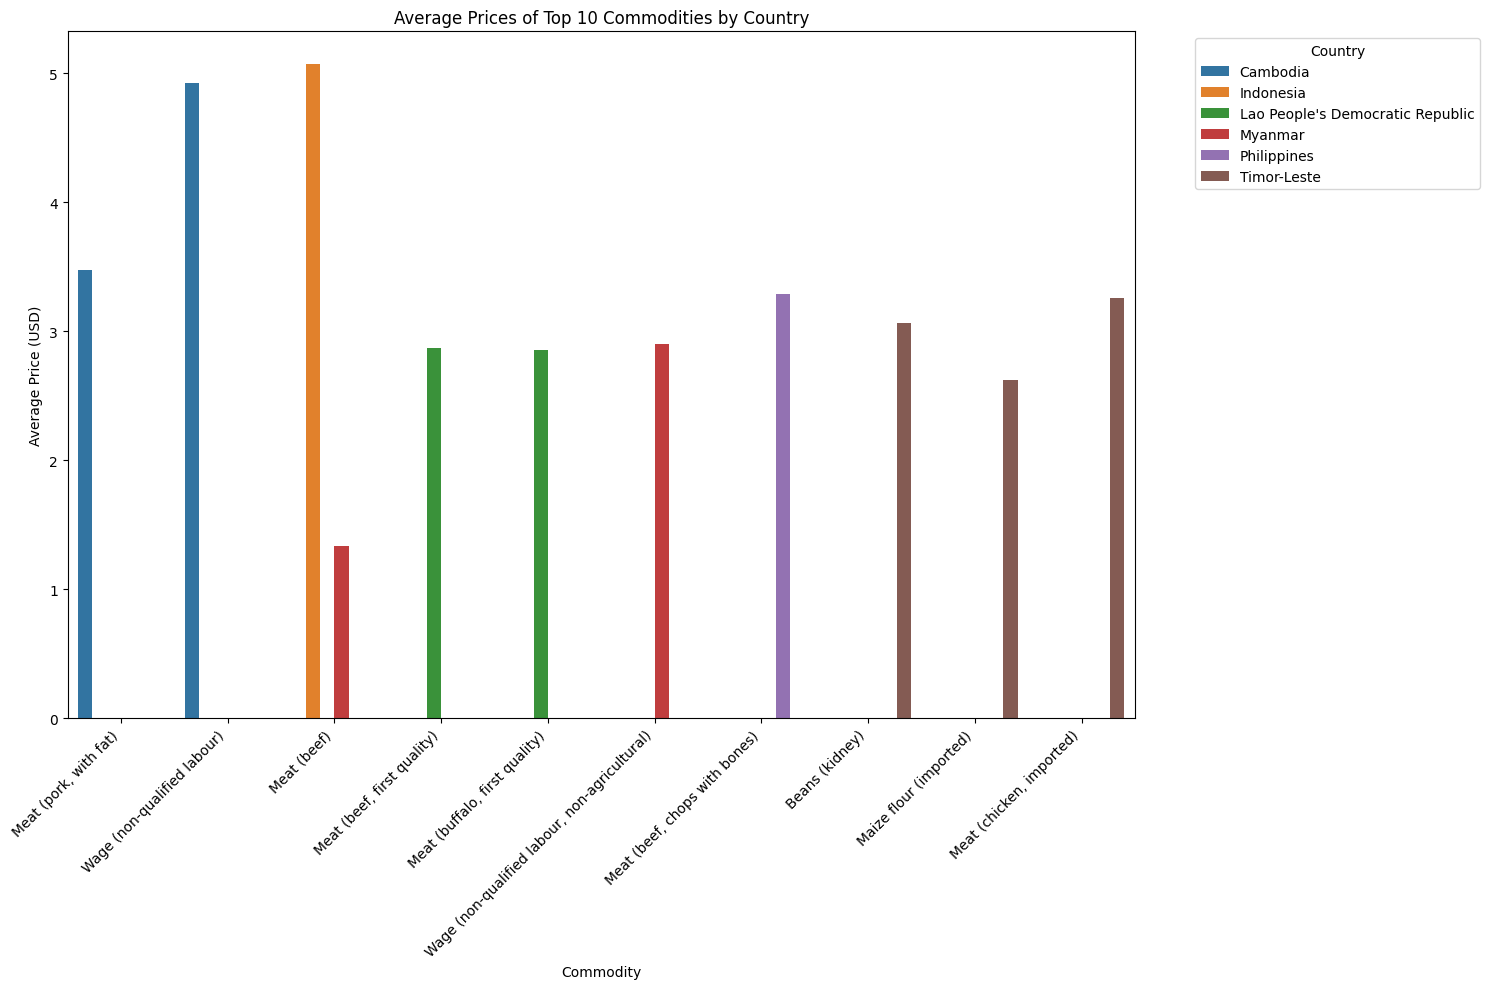

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group the data by country and commodity, calculating the average price in USD
avg_prices_by_country = filtered_df.groupby(['country_name', 'commodity_name'])['price_usd'].mean().reset_index()

# Get the top N commodities by overall average price
top_n = 10  # You can adjust this number
top_commodities = avg_prices_by_country.groupby('commodity_name')['price_usd'].mean().nlargest(top_n).index

# Filter the data to include only these top commodities
plot_data = avg_prices_by_country[avg_prices_by_country['commodity_name'].isin(top_commodities)]

# Create the bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='commodity_name', y='price_usd', hue='country_name', data=plot_data)

plt.title(f'Average Prices of Top {top_n} Commodities by Country')
plt.xlabel('Commodity')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()